# Unsupervised project on Humanitarian Aid

In [2]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Loading the dataset
data = pd.read_csv("C:/Users/dell/Downloads/ipynb datasets/CountryData.csv")

In [4]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,NaN,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310


In [5]:
#Information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     161 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      160 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   161 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 13.2+ KB


In [6]:
#Statistical information of the data
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,161.000000,167.000000,167.000000,160.000000,167.000000,167.000000,161.000000,167.000000
mean,38.270060,41.524839,6.815689,46.890215,16980.768750,7.781832,70.555689,2.947019,12964.155689
std,40.328931,27.758740,2.746837,24.209589,19462.636639,10.570704,8.893172,1.531033,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3335.000000,1.810000,65.300000,1.780000,1330.000000
50%,19.300000,35.400000,6.320000,43.300000,9925.000000,5.390000,73.100000,2.370000,4660.000000
75%,62.100000,51.400000,8.600000,58.750000,22750.000000,10.750000,76.800000,3.910000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
#Shape of the dataset
data.shape

(167, 10)

In [8]:
#Top 5 rows
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200


In [9]:
#Bottom 5 rows
data.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,NaN,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280.0,14.00,52.0,5.40,1460


In [10]:
#no. of unique rows in each column
data.nunique()

country       167
child_mort    139
exports       142
health        147
imports       151
income        149
inflation     156
life_expec    127
total_fer     132
gdpp          157
dtype: int64

In [11]:
#No. of missing rows in each column
data.isnull().sum()

country       0
child_mort    0
exports       6
health        0
imports       0
income        7
inflation     0
life_expec    0
total_fer     6
gdpp          0
dtype: int64

In [12]:
#percentage of missing values in each row
(data.isnull().sum()/(len(data)))*100 

country       0.000000
child_mort    0.000000
exports       3.592814
health        0.000000
imports       0.000000
income        4.191617
inflation     0.000000
life_expec    0.000000
total_fer     3.592814
gdpp          0.000000
dtype: float64

In [13]:
#Data type of each column
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

<Axes: >

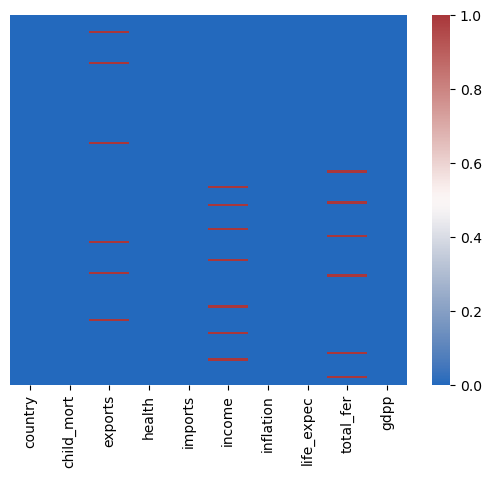

In [14]:
#Visualizing the null values
sns.heatmap(data.isnull(), yticklabels=False, cmap="vlag")

In [15]:
#Handling null values

#Filling the missing values in total_fer column by bfill method
data['total_fer'].fillna(method='bfill', inplace=True)

<Axes: >

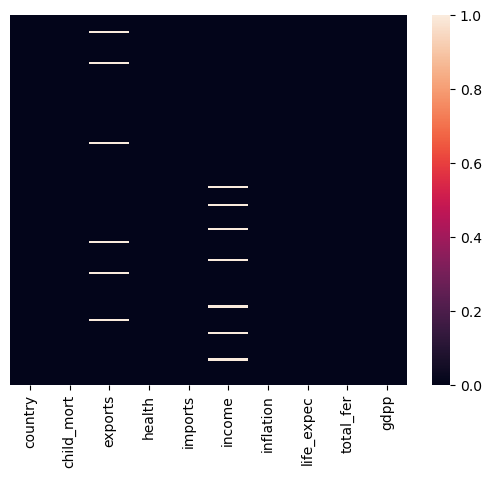

In [16]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='rocket')

In [17]:
#Filling the missing values in exports column by ffill method
data['exports'].fillna(method='ffill', inplace=True)

<Axes: >

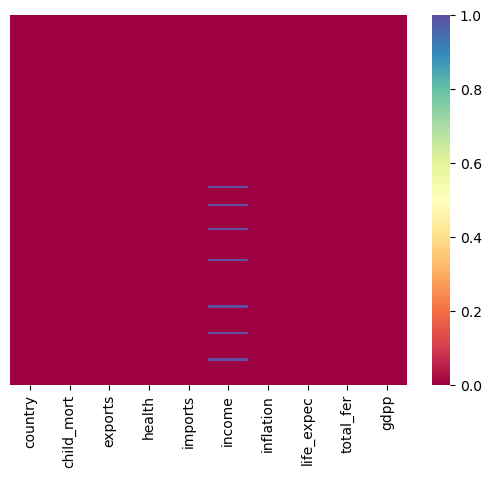

In [18]:
sns.heatmap(data.isnull(), yticklabels=False, cmap="Spectral")

In [19]:
#Filling the missing values in income column by mean method
data['income'].fillna(data['income'].mean(), inplace=True)

<Axes: >

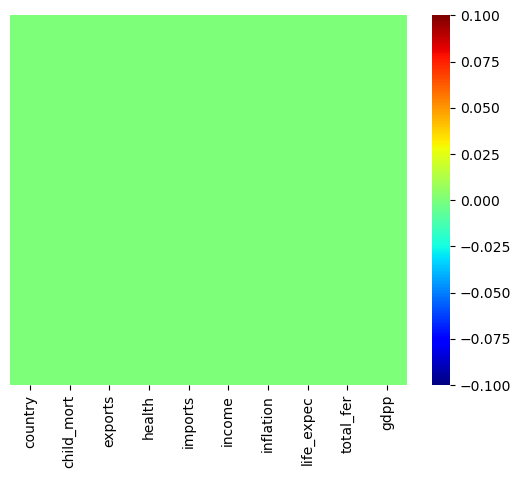

In [20]:
sns.heatmap(data.isnull(), yticklabels=False, cmap='jet')

In [21]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Text(0.5, 1.0, 'Starting 10 country with their gdpp')

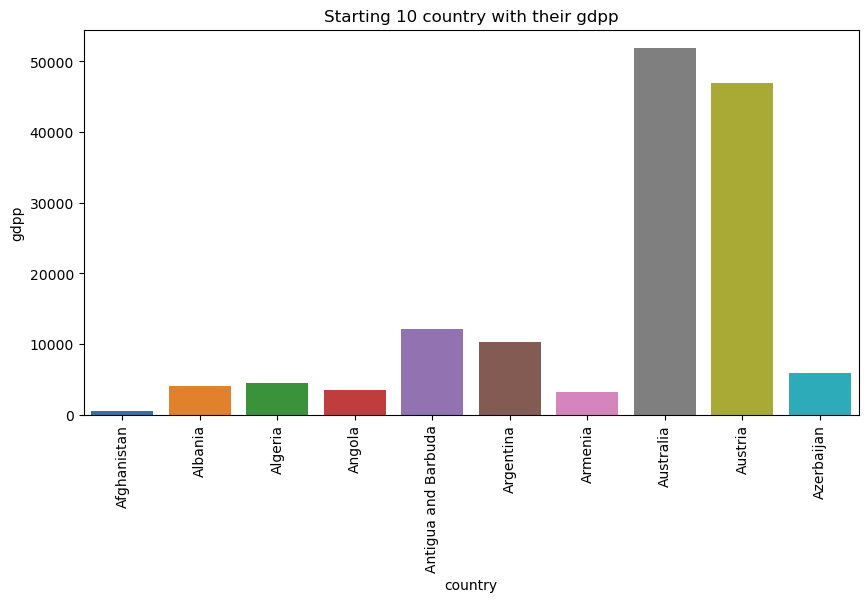

In [22]:
#Plotting the graphs

#Bar plot of the Starting 10 country with their gdpp
plt.figure(figsize=(10,5))
sns.barplot(y="gdpp", x='country', data=data, order=data['country'].iloc[:10])
plt.xticks(rotation=90)
plt.title('Starting 10 country with their gdpp')

<Axes: xlabel='exports', ylabel='Count'>

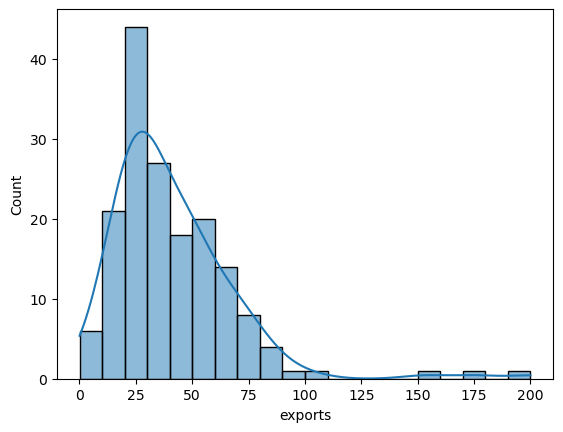

In [23]:
#Histogram of exports
sns.histplot(data['exports'], bins=20, kde=True)

<Axes: xlabel='income', ylabel='Count'>

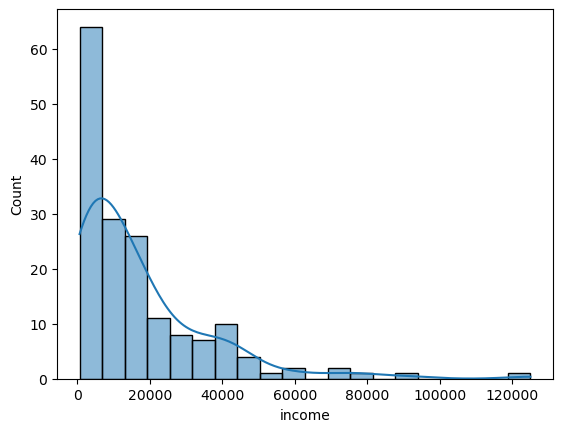

In [24]:
#Histogram of income
sns.histplot(data['income'], bins=20, kde=True)

<Axes: xlabel='gdpp'>

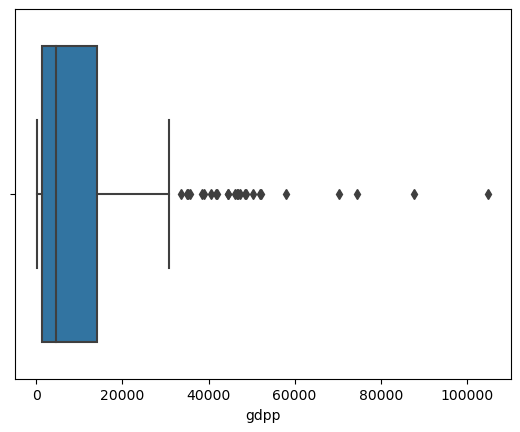

In [25]:
#Boxplot of gdpp
sns.boxplot(x = 'gdpp', data=data)

<Axes: xlabel='imports'>

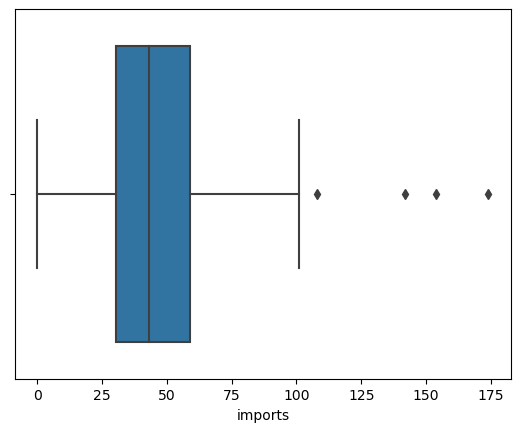

In [26]:
#Boxplot of imports
sns.boxplot(x = 'imports', data=data)

<Axes: xlabel='imports', ylabel='exports'>

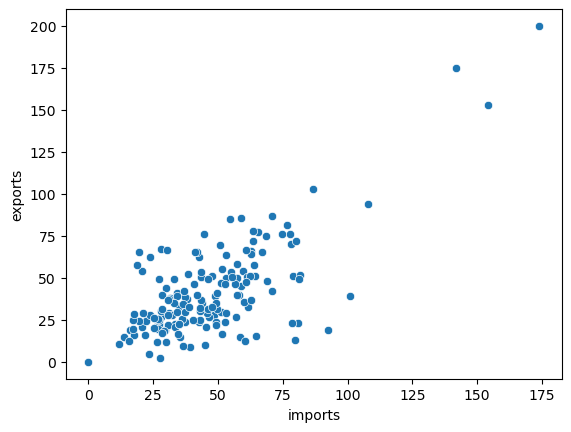

In [27]:
#Scatter plot of imports vs exports
sns.scatterplot(x='imports', y='exports', data=data)

<Axes: xlabel='gdpp'>

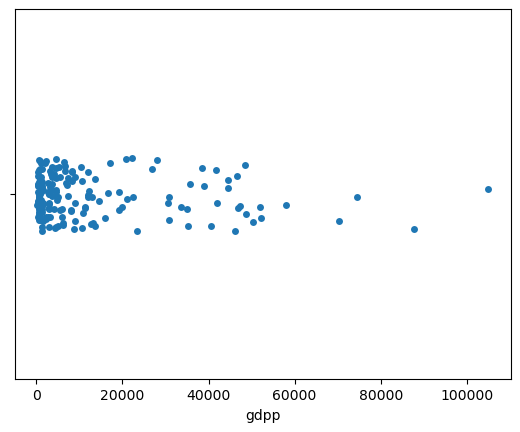

In [28]:
#Stripplot of gdpp
sns.stripplot(x='gdpp', data=data)

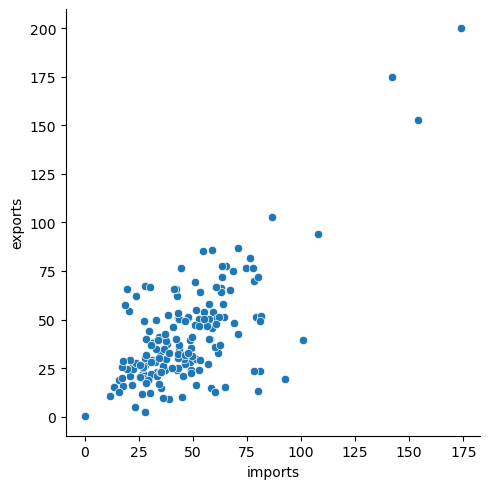

In [29]:
#Rel plot of imports vs exports
sns.relplot(x='imports', y='exports', data=data)

<Axes: xlabel='child_mort', ylabel='Density'>

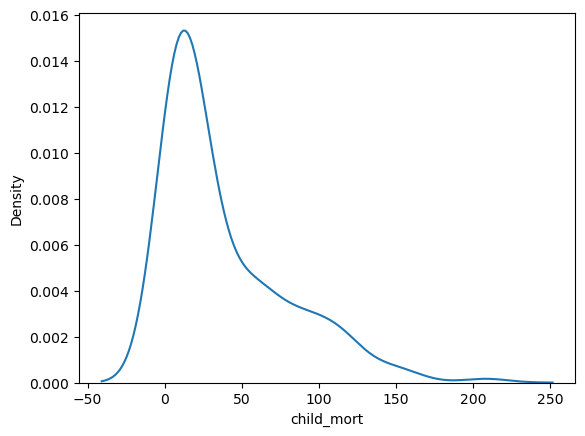

In [30]:
#kde plot of child_mort
sns.kdeplot(x='child_mort', data=data)

<Axes: xlabel='gdpp', ylabel='Proportion'>

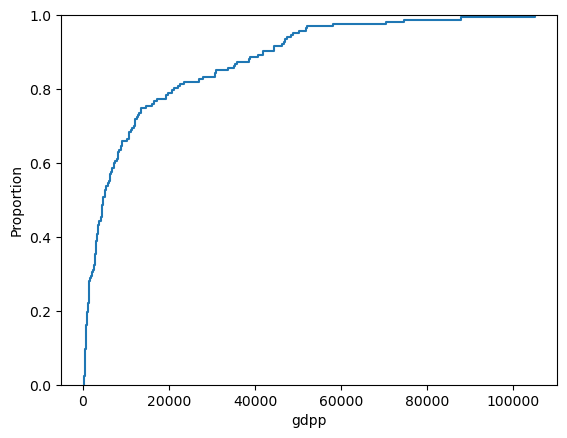

In [31]:
#Ecdf plot of gdpp
sns.ecdfplot(x='gdpp', data=data)

<Axes: xlabel='imports', ylabel='exports'>

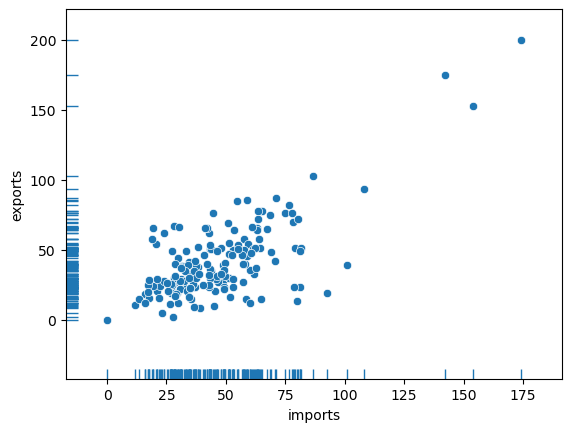

In [32]:
#Rug plot of imports vs exports
sns.scatterplot(x='imports', y='exports', data=data)
sns.rugplot(x='imports', y='exports', data=data)

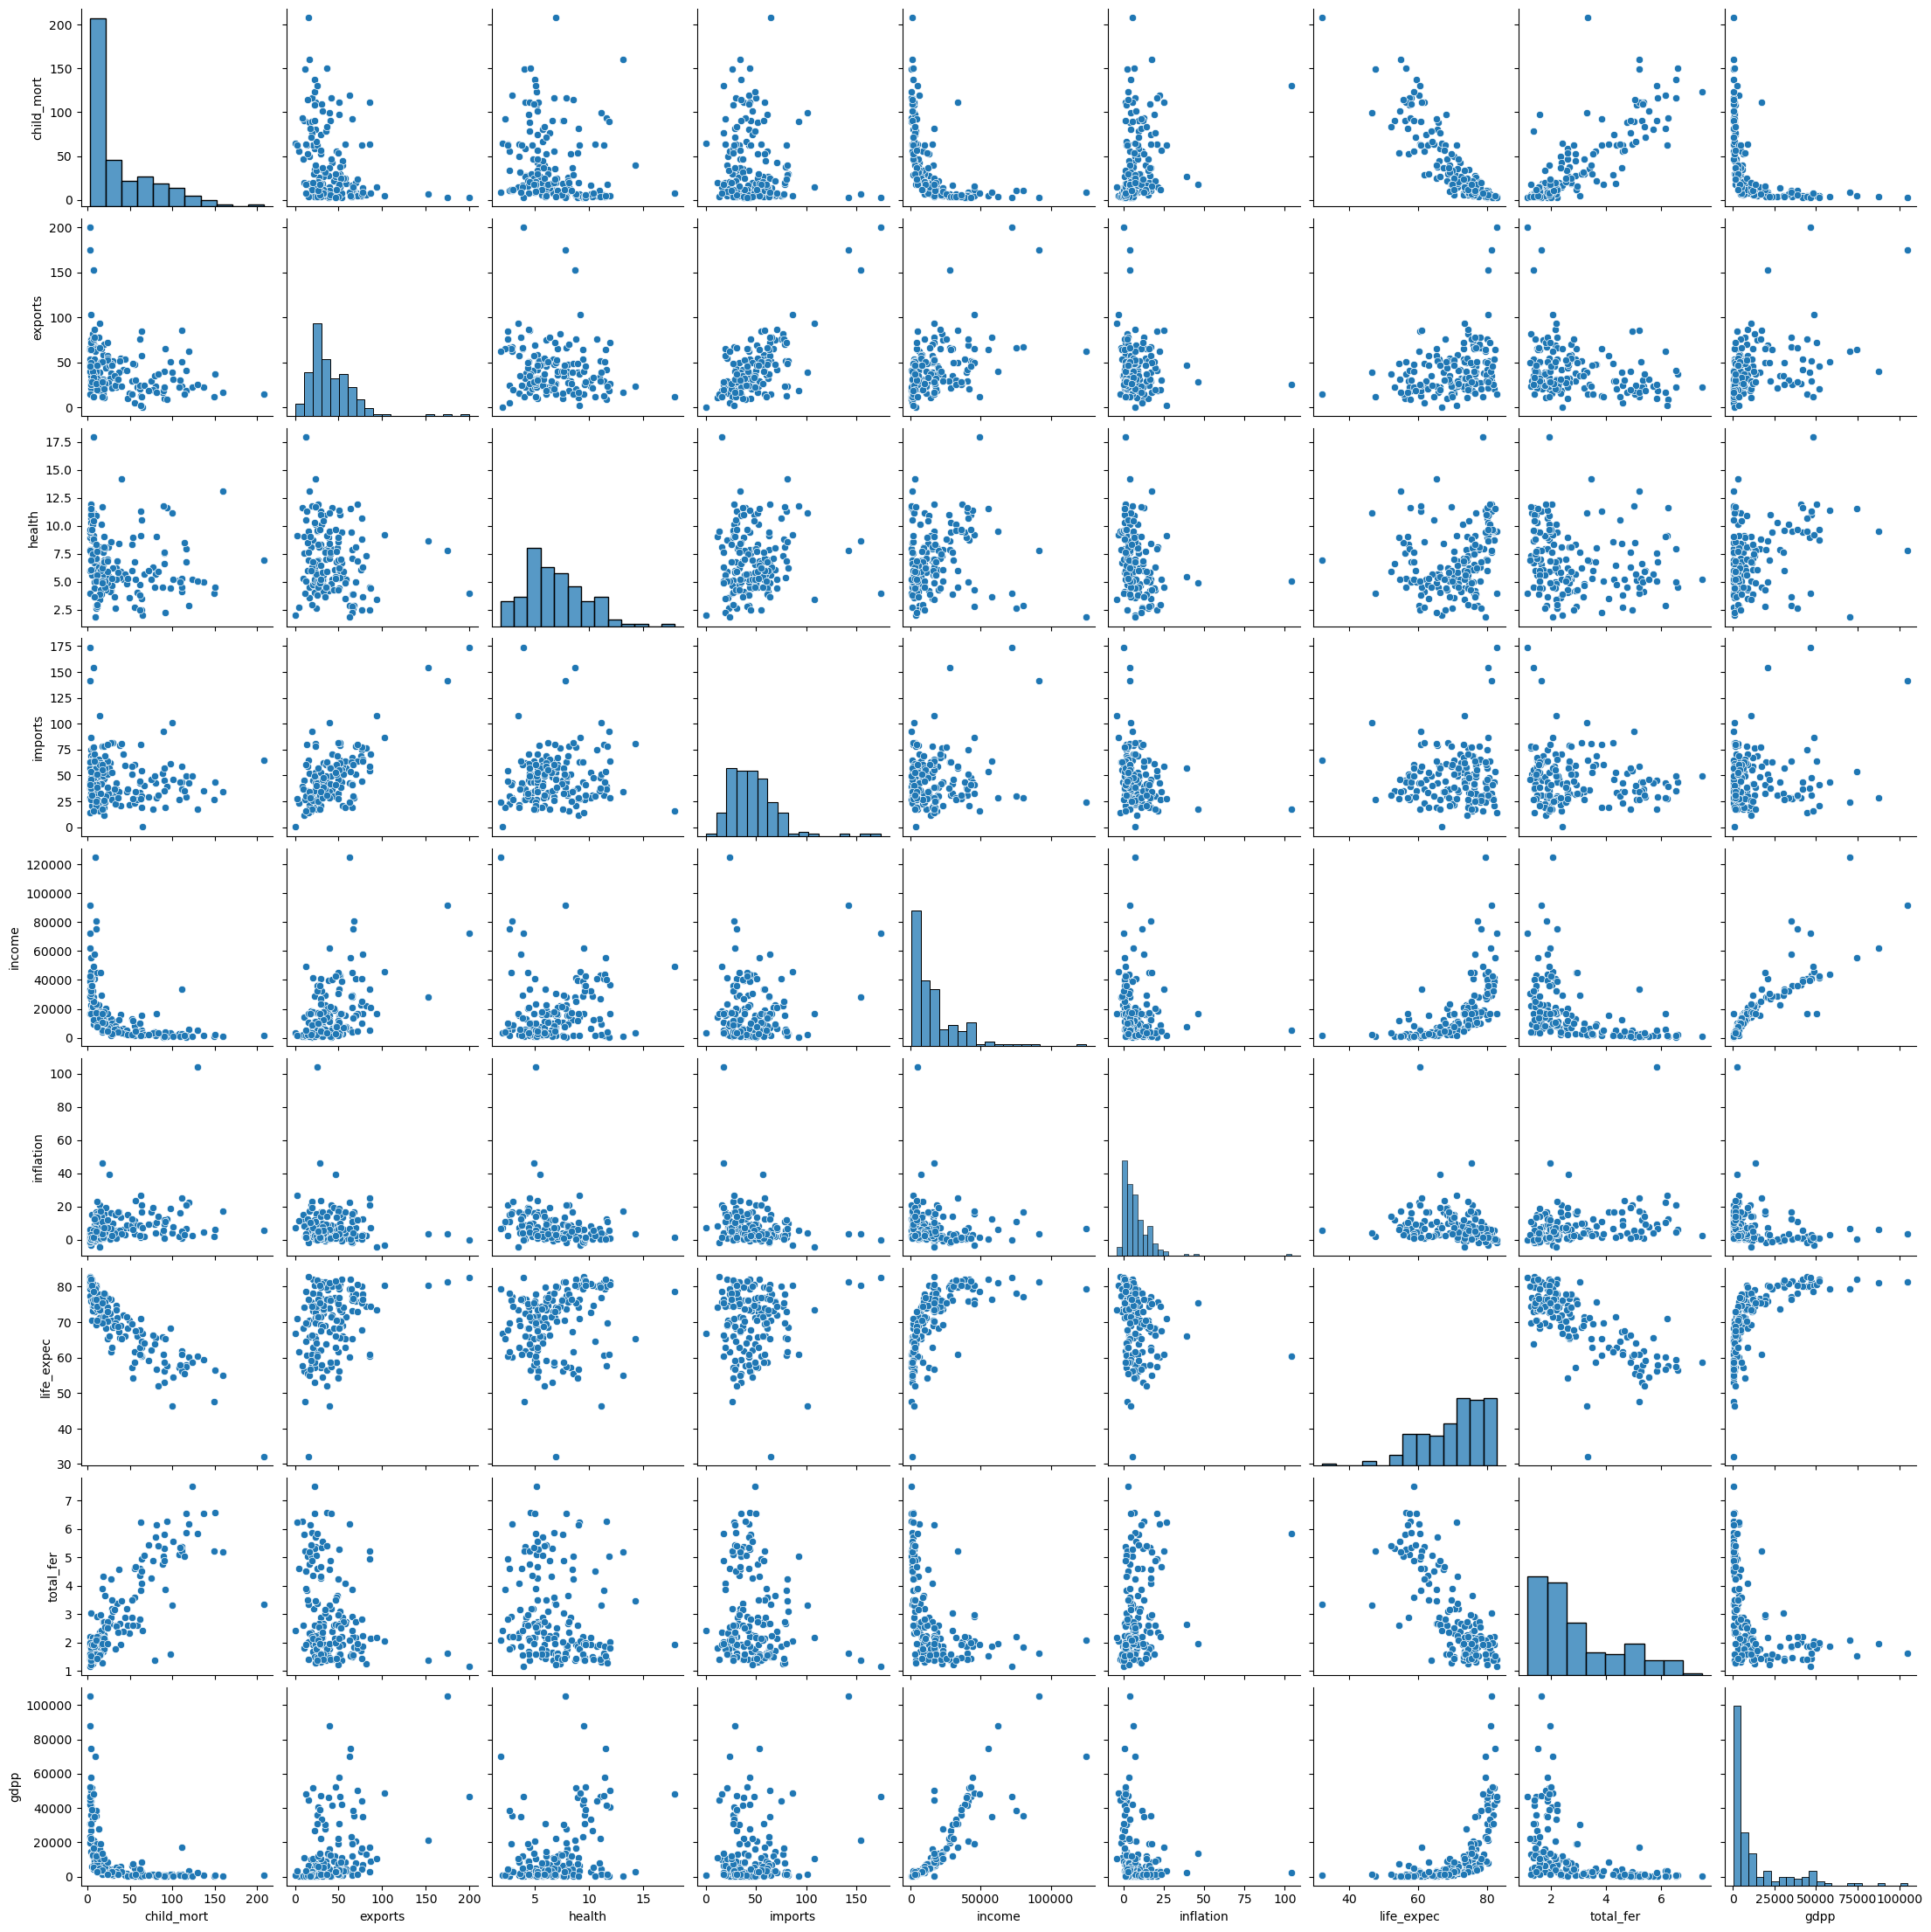

In [33]:
#Pair plot of data
sns.pairplot(data)

In [34]:
#set the 'country' column as the index of the DataFrame 'data'
data.set_index('country',inplace = True)

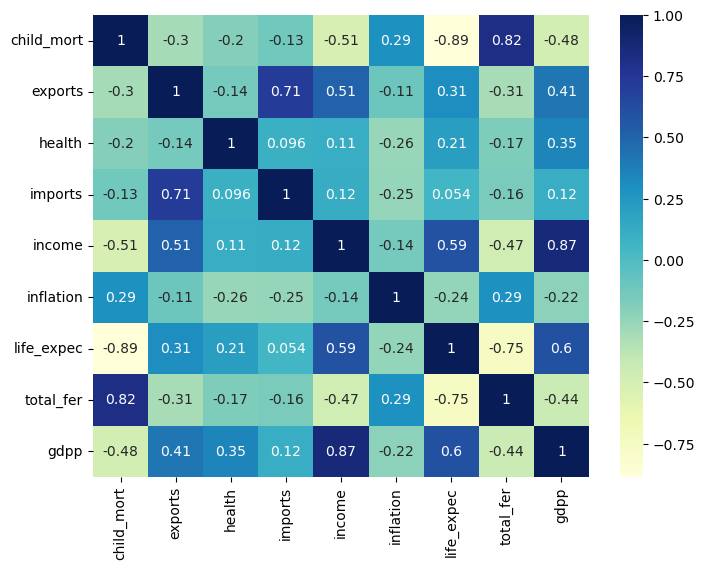

In [35]:
#Heatmap of the data
plt.figure(figsize = (8,6))  
sns.heatmap(data.corr(),annot = True,cmap="YlGnBu")
plt.show()

# K-Means Clustering

Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
#instantiate and fit 'StandardScaler' function
country_scaler = scaler.fit_transform(data)

In [38]:
#Create a dataframe of the scaled features
country_scaler = pd.DataFrame(country_scaler)
country_scaler.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']

#head() to display top five rows
country_scaler.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.143711,0.279088,-0.082455,-0.809382,0.157336,-1.619092,1.923173,-0.679180
1,-0.538949,-0.486137,-0.097016,0.070837,-0.371274,-0.312347,0.647866,-0.832827,-0.485623
2,-0.272833,-0.106205,-0.966073,-0.641762,-0.214882,0.789274,0.670423,-0.013297,-0.465376
3,2.007808,0.766908,-1.448071,-0.165315,-0.583483,1.387054,-1.179234,2.147882,-0.516268
4,-0.695634,0.153172,-0.286894,0.497568,0.111593,-0.601749,0.704258,-0.515590,-0.041817


In [39]:
#Importing libraries required for KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [40]:
#create a list for different values of k
n_clusters = [4, 5, 6, 7, 8]

#use 'for' loop to build the clusters
#'random_state' returns the same sample each time you run the code
#fit and predict on the scaled data
#'silhouette_score' function computes the silhouette score for each k
for K in n_clusters :
    cluster = KMeans(n_clusters=K, random_state=10)
    predict = cluster.fit_predict(country_scaler)
    
    score = silhouette_score(country_scaler, predict, random_state=10)
    print("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 4, silhouette score is 0.2980384159968725)
For n_clusters = 5, silhouette score is 0.21179967012251052)
For n_clusters = 6, silhouette score is 0.299817847216162)
For n_clusters = 7, silhouette score is 0.24420923438348527)
For n_clusters = 8, silhouette score is 0.2233020116391271)


In [41]:
wcss = []                       #Create an empty list to store the WCSS values
K = range(1,10)                 #Set a range of values for the number of clusters (K)

# Loop through each value of K
for k in K:
    kmeanModel = KMeans(n_clusters=k)           # Create a KMeans model with the current value of K
    kmeanModel.fit(country_scaler)              # Fit the model to the country_scaler
    wcss.append(kmeanModel.inertia_)            # Append the inertia (WCSS) to the list

In [42]:
wcss

[1502.9999999999998,
 1061.9886272659876,
 843.5258329491433,
 712.734605398738,
 632.6598355762903,
 574.7148301805647,
 525.3314029483352,
 462.1739597647958,
 434.924936047317]

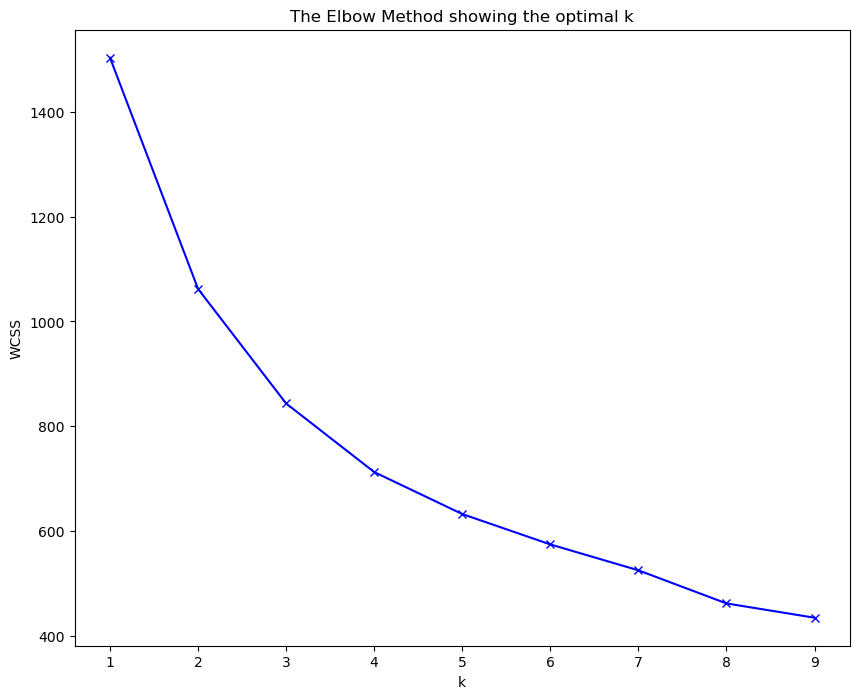

In [43]:
#"Elbow Method" to determine the optimal number of clusters (K) for K-means clustering
plt.figure(figsize=(10,8))            # Set the size of the plot

# Plotting the WCSS values against the number of clusters (K)
plt.plot(K, wcss, 'bx-')                # 'bx-' specifies blue color, marker type 'x', and line style '-'
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# K-Means Clustering with K= 4

In [44]:
#building a K-Means model for k=4
model = KMeans(n_clusters=4, random_state=10)

#fit the model
model.fit(country_scaler)

KMeans(n_clusters=4, random_state=10)

In [45]:
data_output = data.copy(deep = True)
#add a column 'cluster' in the data giving cluster number corresponding to each observation
data_output['Cluster'] = model.labels_

#head to display top 5 rows
data_output.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,1
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,0


In [46]:
#Shape of data_output
data_output.shape

(167, 10)

In [47]:
#'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([89, 45, 30,  3], dtype=int64))

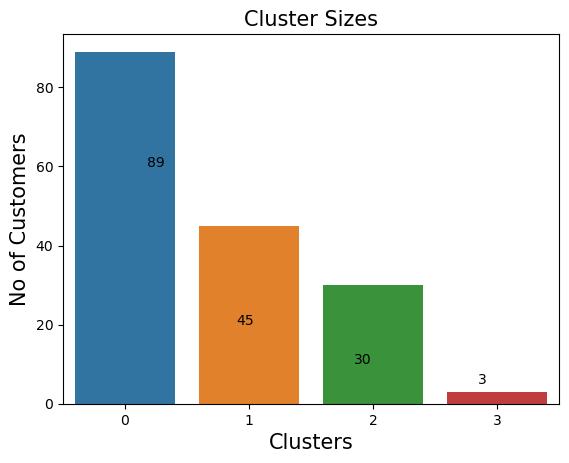

In [48]:
#use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data=data_output, x='Cluster')

#set the axes and plot labels
#set the font size using 'fontsize'
plt.title('Cluster Sizes', fontsize=15)
plt.xlabel('Clusters', fontsize=15)
plt.ylabel('No of Customers', fontsize=15)

#add values in the graph
#'x' and 'y' assigns the position to the text
#'s' represents the text on the plot
plt.text(x=0.18, y=60, s=np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x=0.9, y=20, s=np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x=1.85, y=10, s=np.unique(model.labels_, return_counts=True)[1][2])
plt.text(x=2.85, y=5, s=np.unique(model.labels_, return_counts=True)[1][3])

plt.show()

In [49]:
#Create a KMeans model with 4 clusters, a maximum of 50 iterations, and a random state of 10
model_clus = KMeans(n_clusters = 4, max_iter=50,random_state = 10)
model_clus.fit(country_scaler)             #Fit a model to scaled data

KMeans(max_iter=50, n_clusters=4, random_state=10)

In [50]:
data_km1 = country_scaler        #creates a new DataFrame (data_km1) and assigns the values of the country_scaler DataFrame to it.
data_km1.index = pd.RangeIndex(len(data_km1.index))           #reset the index of the DataFrame data_km1 to a default index

#concatenate the DataFrame data_km1 with a new Series containing the cluster labels assigned by the KMeans model.
countries_detail_km = pd.concat([data_km1, pd.Series(model_clus.labels_)], axis=1)

#assigns new column names to the DataFrame countries_detail_km
countries_detail_km.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp','ClusterID']
countries_detail_km.head()          #head to display top 5 rows

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,1.291532,-1.143711,0.279088,-0.082455,-0.809382,0.157336,-1.619092,1.923173,-0.679180,1
1,-0.538949,-0.486137,-0.097016,0.070837,-0.371274,-0.312347,0.647866,-0.832827,-0.485623,0
2,-0.272833,-0.106205,-0.966073,-0.641762,-0.214882,0.789274,0.670423,-0.013297,-0.465376,0
3,2.007808,0.766908,-1.448071,-0.165315,-0.583483,1.387054,-1.179234,2.147882,-0.516268,1
4,-0.695634,0.153172,-0.286894,0.497568,0.111593,-0.601749,0.704258,-0.515590,-0.041817,0


In [51]:
#number of occurrences of each unique value in the 'ClusterID' 
countries_detail_km['ClusterID'].value_counts()

ClusterID
0    89
1    45
2    30
3     3
Name: count, dtype: int64

In [52]:
data_cluster = pd.concat([data.reset_index(),countries_detail_km['ClusterID']],axis=1)
data_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,0


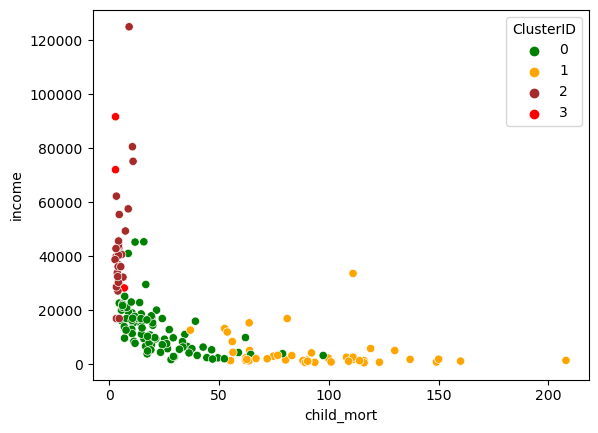

In [53]:
#Scatter plot of child_mort in x-axis and income in y-axis with different colors indicating the cluster assignments
sns.scatterplot(x='child_mort',y='income',hue='ClusterID',data=data_cluster,palette=['green','orange','brown','red','blue'])
plt.show()

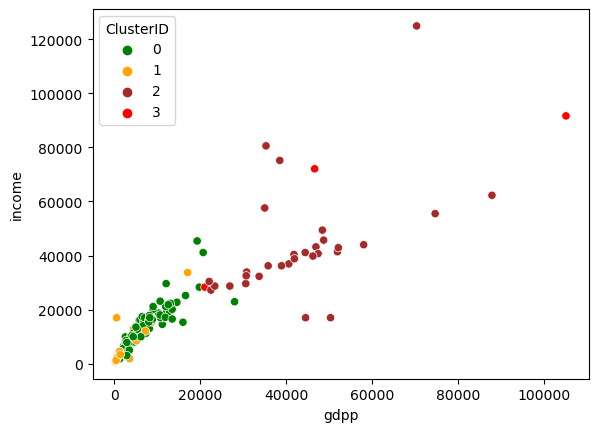

In [54]:
#Scatter plot of gdpp in x-axis and income in y-axis with different colors indicating the cluster assignments
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',data=data_cluster,palette=['green','orange','brown','red','blue'])
plt.show()

# Cluster Analysis

List of countries lies in which clusters

In [55]:
#Rows which belong to ClusterID=0
data_cluster[data_cluster['ClusterID']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700.0,20.90,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700.0,7.77,73.3,1.69,3220,0
...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100.0,4.91,76.4,2.08,11900,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240.0,16.50,68.8,2.34,1380,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970,0
163,Venezuela,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,1.95,13500,0


In [56]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=0
data_cluster[data_cluster['ClusterID']==0].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.0
mean,22.889888,41.027966,6.195506,48.200740,12810.034551,7.562596,72.779775,2.255506,6789.910112,0.0
std,16.960355,19.503700,2.150796,19.903132,8862.312344,7.816323,4.050566,0.702229,5459.273960,0.0
min,3.400000,0.109000,1.970000,0.065900,1780.000000,-4.210000,61.700000,1.250000,592.000000,0.0
25%,11.200000,26.300000,4.840000,33.000000,6440.000000,2.330000,69.900000,1.650000,2960.000000,0.0
50%,18.100000,37.600000,5.880000,49.300000,10400.000000,5.880000,73.700000,2.160000,4680.000000,0.0
75%,29.100000,51.600000,7.460000,61.200000,16980.768750,10.000000,76.100000,2.660000,10300.000000,0.0
max,97.400000,93.800000,14.200000,108.000000,45400.000000,45.900000,80.400000,4.340000,28000.000000,0.0


In [57]:
#Rows which belong to ClusterID=1
data_cluster[data_cluster['ClusterID']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610.00000,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900.00000,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820.00000,0.885,61.8,5.36,758,1
21,Botswana,52.5,29.70,8.30,51.3,13300.00000,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430.00000,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764.00000,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660.00000,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888.00000,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930.00000,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410.00000,3.870,65.9,4.75,769,1


In [58]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=1
data_cluster[data_cluster['ClusterID']==1].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.0
mean,93.175556,29.844667,6.475111,41.748889,4298.528194,11.929444,58.884444,5.050000,1955.822222,1.0
std,34.052160,19.029973,2.688521,17.866203,6072.108814,15.818609,6.401774,1.026397,3018.085789,0.0
min,36.900000,2.200000,2.200000,17.200000,609.000000,0.885000,32.100000,2.590000,231.000000,1.0
25%,63.700000,17.100000,4.750000,29.600000,1390.000000,3.870000,56.500000,4.560000,547.000000,1.0
50%,90.200000,23.800000,5.690000,39.200000,1870.000000,8.790000,59.300000,5.110000,769.000000,1.0
75%,111.000000,39.400000,8.300000,49.100000,4280.000000,16.600000,62.200000,5.710000,1480.000000,1.0
max,208.000000,85.800000,13.100000,101.000000,33700.000000,104.000000,71.100000,7.490000,17100.000000,1.0


In [59]:
#Rows which belong to ClusterID=2
data_cluster[data_cluster['ClusterID']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
7,Australia,4.8,20.8,8.73,20.9,41400.00000,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.3,11.00,47.8,43200.00000,0.873,80.5,1.44,46900,2
15,Belgium,4.5,76.4,10.70,74.7,41100.00000,1.880,80.0,1.86,44400,2
23,Brunei,10.5,67.4,2.84,28.0,80600.00000,16.700,77.1,1.84,35300,2
29,Canada,5.6,29.1,11.30,31.0,40700.00000,2.870,81.3,1.63,47400,2
42,Cyprus,3.6,50.2,5.97,57.5,33900.00000,2.010,79.9,1.42,30800,2
44,Denmark,4.1,50.5,11.40,43.6,44000.00000,3.220,79.5,1.87,58000,2
53,Finland,3.0,38.7,8.95,37.4,39800.00000,0.351,80.0,1.87,46200,2
54,France,4.2,26.8,11.90,28.1,36900.00000,1.050,81.4,2.03,40600,2
58,Germany,4.2,42.3,11.60,37.1,40400.00000,0.758,80.1,1.39,41800,2


In [60]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=2
data_cluster[data_cluster['ClusterID']==2].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,4.953333,45.860000,9.168667,39.736667,43672.051250,2.742200,80.376667,1.795333,43333.333333,2.0
std,2.159140,21.695695,3.266299,17.455134,20997.972975,4.266366,1.440231,0.369293,15040.114942,0.0
min,2.600000,12.400000,1.810000,13.600000,16980.768750,-3.220000,76.500000,1.230000,22100.000000,2.0
25%,3.825000,28.425000,8.785000,28.025000,32350.000000,0.650500,79.825000,1.465000,34025.000000,2.0
50%,4.200000,44.250000,9.535000,35.000000,40100.000000,1.190000,80.400000,1.865000,41850.000000,2.0
75%,5.100000,63.575000,11.000000,47.400000,45275.000000,3.205000,81.400000,1.972500,48625.000000,2.0
max,10.800000,103.000000,17.900000,86.500000,125000.000000,16.700000,82.800000,3.030000,87800.000000,2.0


In [61]:
#Rows which belong to ClusterID=3
data_cluster[data_cluster['ClusterID']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
91,Luxembourg,2.8,175.0,7.77,142.0,91700.0,3.620,81.3,1.63,105000,3
98,Malta,6.8,153.0,8.65,154.0,28300.0,3.830,80.3,1.36,21100,3
133,Singapore,2.8,200.0,3.96,174.0,72100.0,-0.046,82.7,1.15,46600,3


In [62]:
#descriptive statistics for the subset of the DataFrame where the 'ClusterID'=3
data_cluster[data_cluster['ClusterID']==3].describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0
mean,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667,3.0
std,2.309401,23.515952,2.492877,16.165808,32460.642836,2.179718,1.205543,0.240624,43011.665084,0.0
min,2.800000,153.000000,3.960000,142.000000,28300.000000,-0.046000,80.300000,1.150000,21100.000000,3.0
25%,2.800000,164.000000,5.865000,148.000000,50200.000000,1.787000,80.800000,1.255000,33850.000000,3.0
50%,2.800000,175.000000,7.770000,154.000000,72100.000000,3.620000,81.300000,1.360000,46600.000000,3.0
75%,4.800000,187.500000,8.210000,164.000000,81900.000000,3.725000,82.000000,1.495000,75800.000000,3.0
max,6.800000,200.000000,8.650000,174.000000,91700.000000,3.830000,82.700000,1.630000,105000.000000,3.0


# Hierarchical Clustering

In [63]:
#Importing libraries required for Hierarchical clustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [64]:
Z = sch.linkage(country_scaler, method='ward')       #Using linkage function to perform hierarchical clustering
Z

array([[4.10000000e+01, 1.21000000e+02, 2.70734496e-01, 2.00000000e+00],
       [7.50000000e+01, 1.39000000e+02, 3.47213745e-01, 2.00000000e+00],
       [2.40000000e+01, 8.50000000e+01, 4.02942480e-01, 2.00000000e+00],
       [1.11000000e+02, 1.58000000e+02, 4.95185830e-01, 2.00000000e+00],
       [6.00000000e+01, 1.22000000e+02, 5.43987237e-01, 2.00000000e+00],
       [1.00000000e+02, 1.69000000e+02, 5.56344135e-01, 3.00000000e+00],
       [1.00000000e+00, 4.80000000e+01, 5.59195450e-01, 2.00000000e+00],
       [5.30000000e+01, 1.44000000e+02, 5.69121892e-01, 2.00000000e+00],
       [2.90000000e+01, 5.40000000e+01, 5.90810949e-01, 2.00000000e+00],
       [2.00000000e+01, 1.30000000e+02, 6.04995067e-01, 2.00000000e+00],
       [6.00000000e+00, 7.60000000e+01, 6.12696438e-01, 2.00000000e+00],
       [5.60000000e+01, 1.29000000e+02, 6.26808521e-01, 2.00000000e+00],
       [4.30000000e+01, 1.35000000e+02, 6.39905341e-01, 2.00000000e+00],
       [1.18000000e+02, 1.52000000e+02, 6.47282063e

Text(0.5, 1.0, 'Hierarchical Clustering')

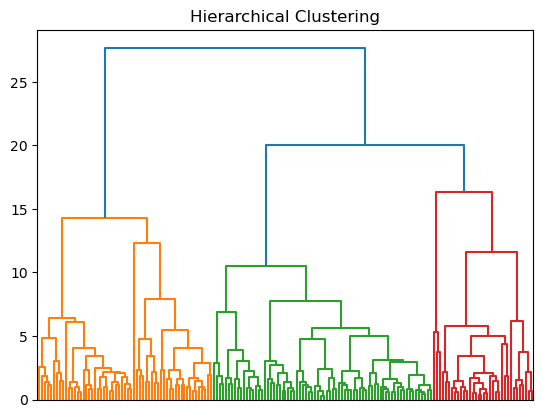

In [65]:
#Creating and Plotting a Dendrogram

den = sch.dendrogram(Z)         #Dendrogram plot based on the hierarchical clustering linkage matrix Z.
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)
plt.title('Hierarchical Clustering')

Creating a function to determine the cutting line

In [66]:
def fd(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args, **kwargs)
    
    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('Sample index or (cluster size)')
        plt.ylabel('Distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x,y), xytext=(0, -5), 
                            textcoords='offset points',
                            va='top', ha='center')
                
        if max_d:
            plt.axhline(y=max_d, c='k', linestyle='--', label='Cutting Line')
            plt.legend()
    return ddata

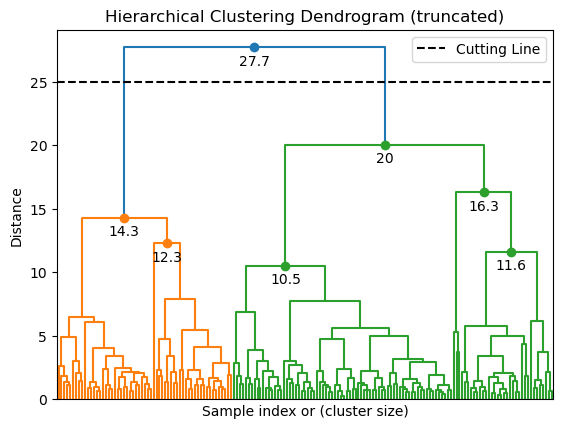

In [67]:
fd(Z, leaf_rotation=90., show_contracted=True, annotate_above=10, max_d=25)
plt.tick_params(
    axis='x',
    which='both',
    bottom=False,
    top=False,
    labelbottom=False)

In [68]:
# Importing packages
from sklearn.cluster import AgglomerativeClustering 

In [69]:
# Creating a Agglomerative Clustering
hc_model = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')

In [70]:
# Fitting the model
y_cluster = hc_model.fit_predict(country_scaler)

In [71]:
#create a copy of the DataFrame country_scaler and assigns it to a new DataFrame named data_clustered
data_clustered = country_scaler.copy()

In [72]:
#adds a new column named "Cluster" to the DataFrame data_clustered and assigns the values from the y_cluster array to that column and specifies the data type of the new column as 'object'.
data_clustered["Cluster"] = y_cluster.astype('object')

In [73]:
#Top 5 rows 
data_clustered.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,1.291532,-1.143711,0.279088,-0.082455,-0.809382,0.157336,-1.619092,1.923173,-0.679180,1
1,-0.538949,-0.486137,-0.097016,0.070837,-0.371274,-0.312347,0.647866,-0.832827,-0.485623,0
2,-0.272833,-0.106205,-0.966073,-0.641762,-0.214882,0.789274,0.670423,-0.013297,-0.465376,1
3,2.007808,0.766908,-1.448071,-0.165315,-0.583483,1.387054,-1.179234,2.147882,-0.516268,1
4,-0.695634,0.153172,-0.286894,0.497568,0.111593,-0.601749,0.704258,-0.515590,-0.041817,0


In [74]:
#creating a list named cols that contains the column names of the DataFrame country_scaler
cols = list(country_scaler.columns)
cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

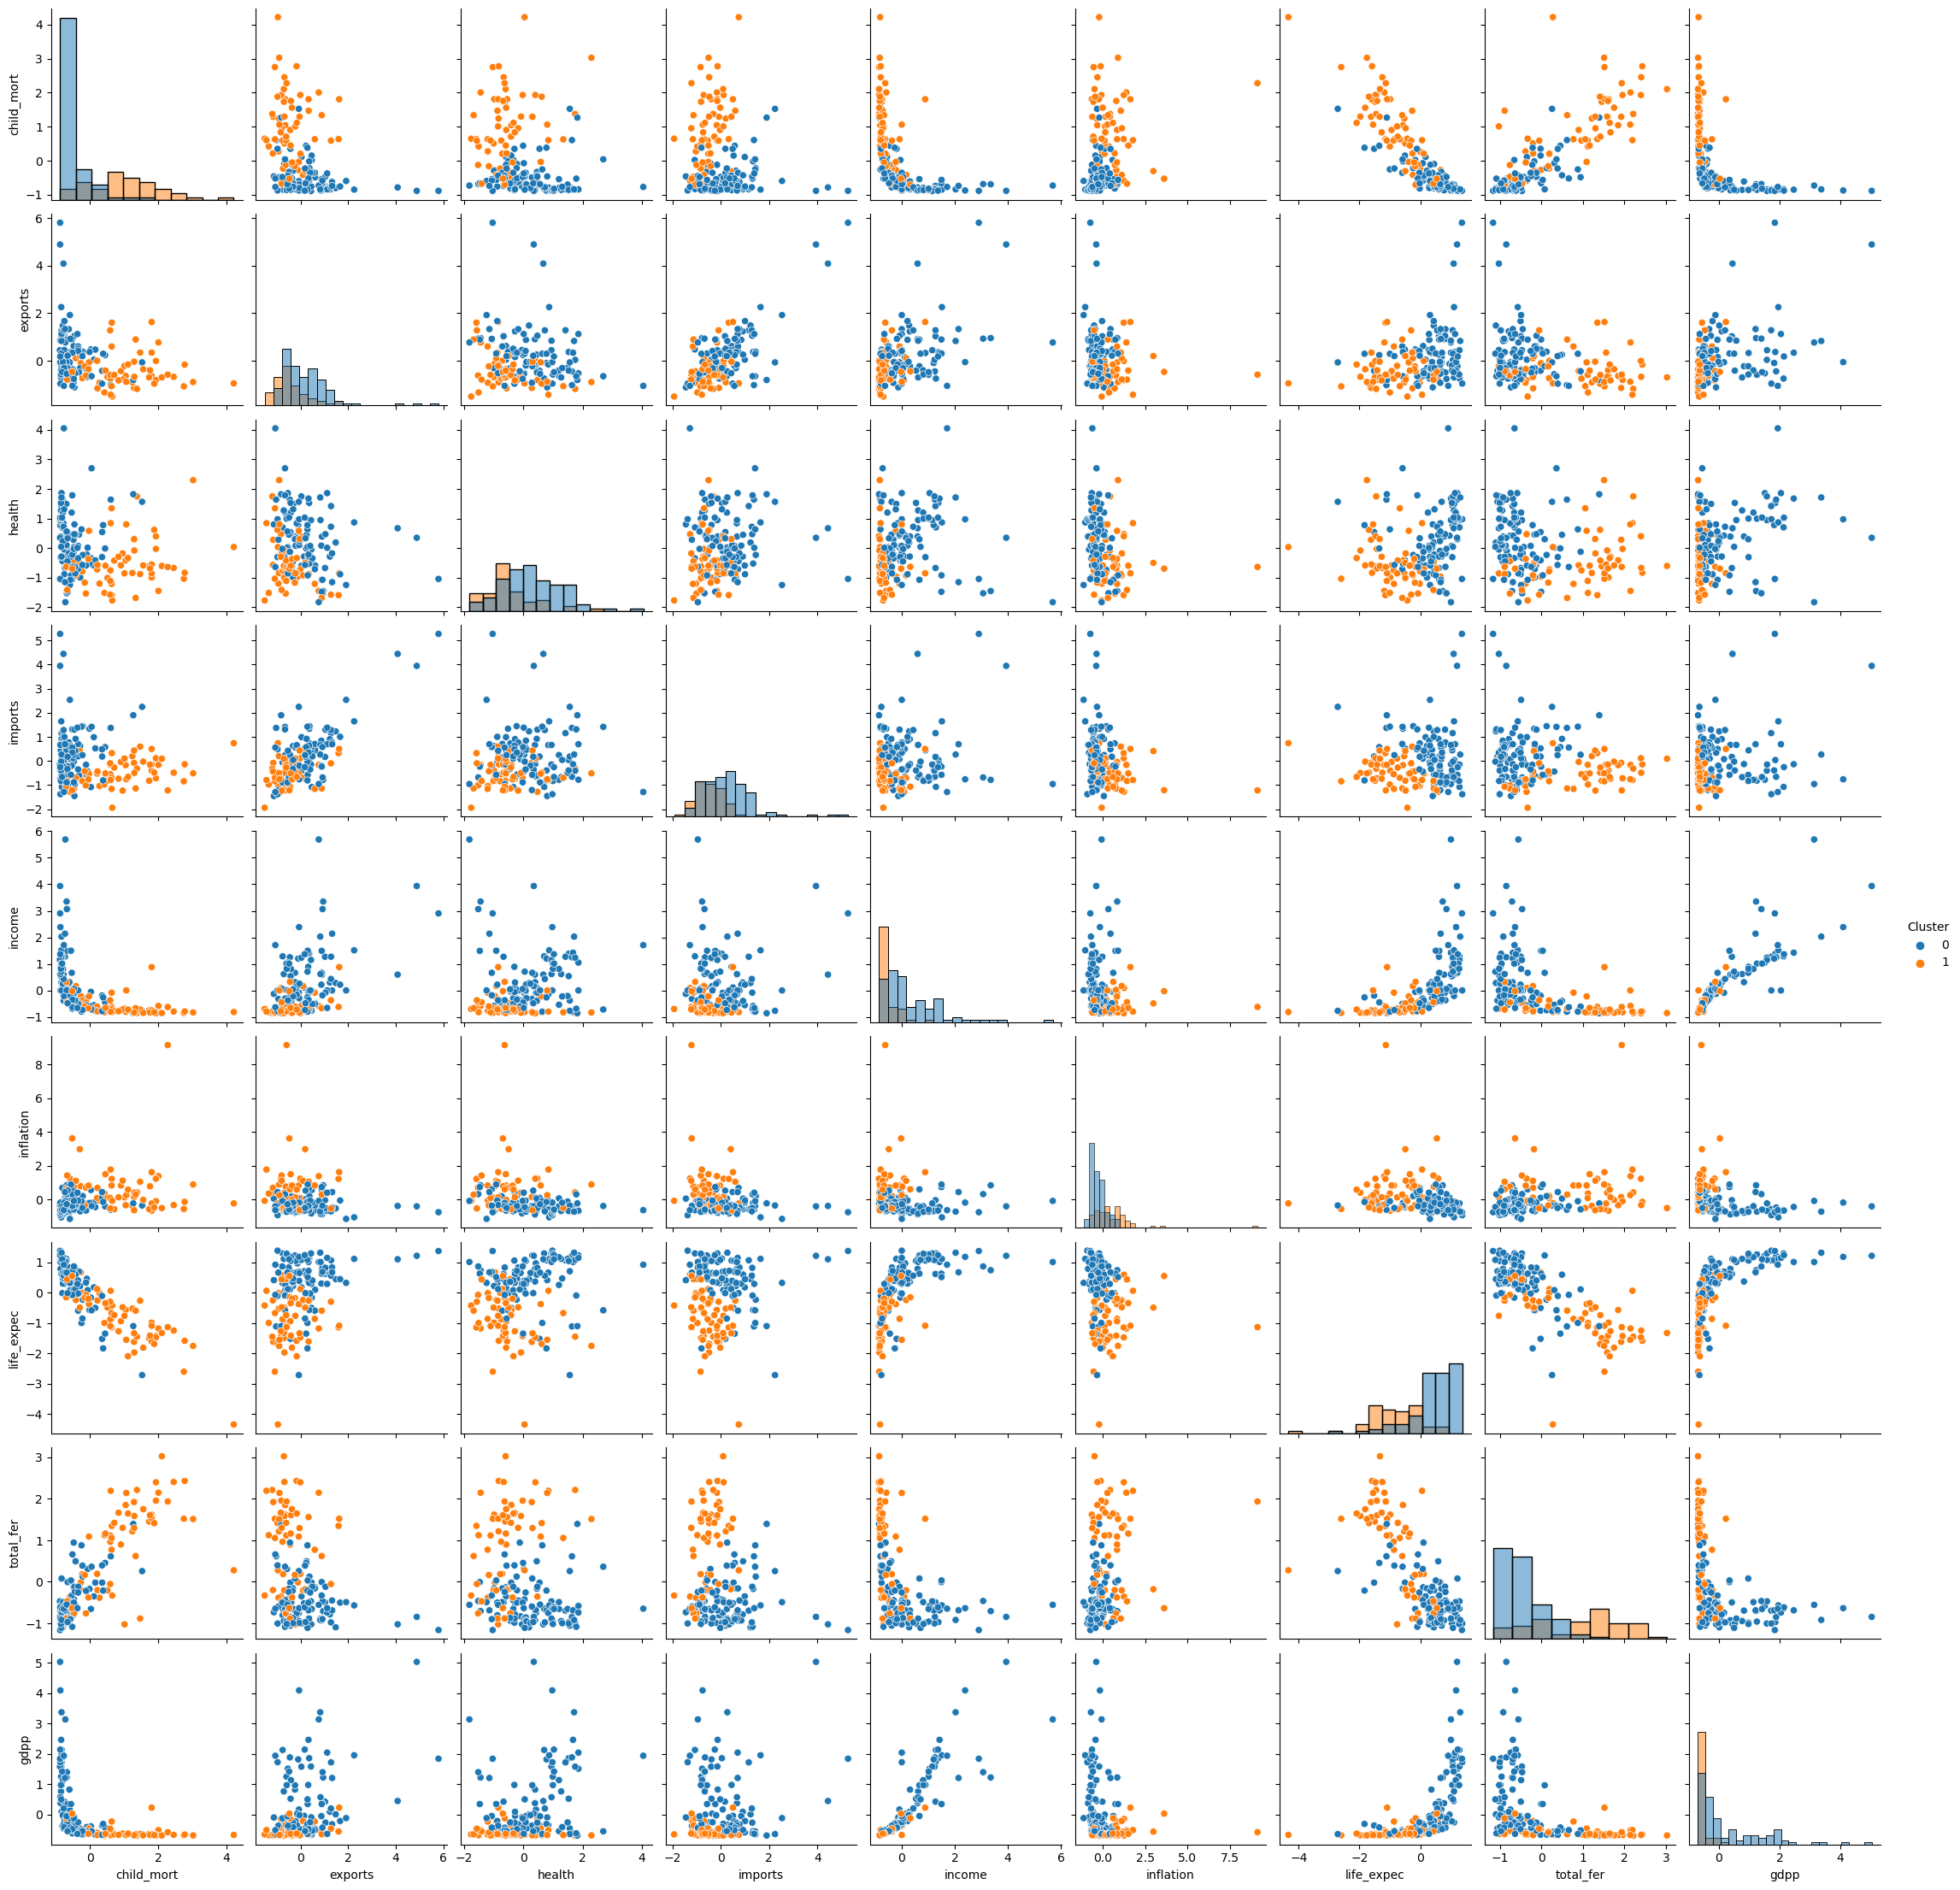

In [75]:
#Pairplot of DataFrame data_custered with hue='Cluster'
sns.pairplot(data_clustered, hue="Cluster", diag_kind="hist")

In [76]:
#copy of the DataFrame data_clustered and assigns it to a new DataFrame named result
result = data_clustered.copy()

In [77]:
#replacing the values 1 with "Positive" and the values 0 with "Negative"
result.replace({'Cluster' : 1} , 'Positive' , inplace=True)
result.replace({'Cluster' : 0} , 'Negeative' , inplace= True)

In [78]:
#Top 5 rows
result.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,1.291532,-1.143711,0.279088,-0.082455,-0.809382,0.157336,-1.619092,1.923173,-0.679180,Positive
1,-0.538949,-0.486137,-0.097016,0.070837,-0.371274,-0.312347,0.647866,-0.832827,-0.485623,Negeative
2,-0.272833,-0.106205,-0.966073,-0.641762,-0.214882,0.789274,0.670423,-0.013297,-0.465376,Positive
3,2.007808,0.766908,-1.448071,-0.165315,-0.583483,1.387054,-1.179234,2.147882,-0.516268,Positive
4,-0.695634,0.153172,-0.286894,0.497568,0.111593,-0.601749,0.704258,-0.515590,-0.041817,Negeative


# Principal Component Analysis (PCA)

Covariance matrix

In [79]:
#Importing libraries required for PCA
from numpy.linalg import eig
from sklearn.decomposition import PCA

In [80]:
# generate the covariance matrix using 'cov' function
cov_mat = np.cov(country_scaler.T)

# as 'cov_mat' is a numpy array, select first five observations with [0:5]
print(cov_mat[0:5])

[[ 1.0060241  -0.30049354 -0.2016093  -0.12797725 -0.51646988  0.29001277
  -0.89201752  0.82552578 -0.485942  ]
 [-0.30049354  1.0060241  -0.14136494  0.71795717  0.51306633 -0.10672529
   0.30718668 -0.30926108  0.41673286]
 [-0.2016093  -0.14136494  1.0060241   0.09629328  0.11430576 -0.2569142
   0.21196135 -0.17329798  0.34804965]
 [-0.12797725  0.71795717  0.09629328  1.0060241   0.12126884 -0.2484822
   0.05471819 -0.16236715  0.11619394]
 [-0.51646988  0.51306633  0.11430576  0.12126884  1.0060241  -0.13712621
   0.59810575 -0.47055151  0.87903588]]


In [81]:
# use 'eig' function to compute eigenvalues and eigenvectors of the covariance matrix
eig_val, eig_vec = np.linalg.eig(cov_mat)

print('Eigenvalues:','\n','\n', eig_val,"\n")

print('Eigenvectors:','\n','\n',eig_vec,'\n')

Eigenvalues: 
 
 [4.08726949 1.55056155 1.1902212  1.0064827  0.66572336 0.24105233
 0.07633472 0.1067577  0.12981381] 

Eigenvectors: 
 
 [[-4.22167495e-01  1.98178955e-01 -3.56705875e-02  3.58964604e-01
   1.48936963e-01 -2.80222485e-01 -5.15735734e-01  4.93693979e-01
  -2.04811566e-01]
 [ 2.81249972e-01  6.18810538e-01  1.30577247e-01  7.32328360e-03
  -4.87463632e-02  7.39000629e-02  8.31837103e-02 -1.48844156e-01
  -6.95669737e-01]
 [ 1.47283904e-01 -2.71407749e-01 -5.96126780e-01  4.42617593e-01
  -5.08216151e-01 -9.88153936e-03 -1.00535645e-01 -1.81773270e-01
  -2.27678665e-01]
 [ 1.62370800e-01  6.54201690e-01 -3.31207517e-01 -8.30340021e-02
  -2.81034771e-01  2.62343033e-02 -7.98175208e-02  1.62415547e-01
   5.62711631e-01]
 [ 3.95410856e-01  4.09547747e-02  2.98454585e-01  4.05934400e-01
   2.38347798e-01 -1.42928255e-01 -4.61076776e-01 -4.74167336e-01
   2.71017472e-01]
 [-1.92719335e-01  3.94141580e-04  6.34808561e-01  1.52332662e-01
  -7.24687112e-01 -4.25002712e-02  3.304

Decide number of Principal Components

In [82]:
# create a list of eigenvalues
eig_val = list(eig_val)

# 'sort(reverse = True)' will sort the eigenvalues in the descending order
eig_val.sort(reverse = True)
print(eig_val)

[4.087269486153574, 1.5505615536711155, 1.1902212026031957, 1.006482695931633, 0.6657233637289663, 0.2410523348720416, 0.12981380801840312, 0.10675769949570632, 0.07633472299524156]


Scree plot: Plot the eigenvalues and choose the components before elbow point

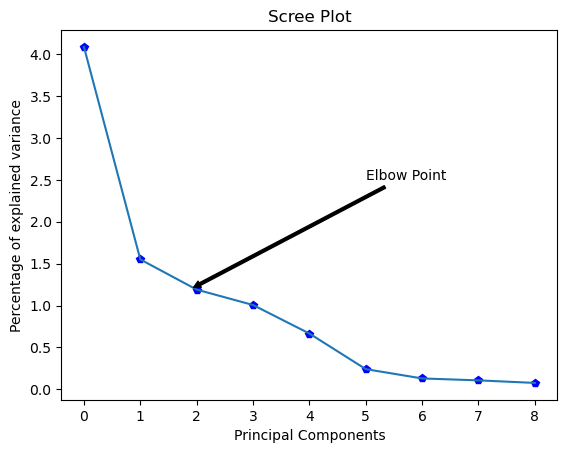

In [83]:
# 'bp' represents blue color and pentagonal shape of points
plt.plot(eig_val,'bp')            

# plot a line plot
plt.plot(eig_val) 

# label the x-axis
plt.xlabel('Principal Components')    

# label the y-axis
plt.ylabel('Percentage of explained variance')      

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(text ='Elbow Point', xy=(1.9,1.2), xytext=(5, 2.5), arrowprops=dict(facecolor='black', arrowstyle = 'simple'))

# title of the plot
plt.title('Scree Plot')

plt.show()   

Calculate Principal components

In [84]:
eigenvector = eig_vec[:,0:3]

eigenvector

array([[-4.22167495e-01,  1.98178955e-01, -3.56705875e-02],
       [ 2.81249972e-01,  6.18810538e-01,  1.30577247e-01],
       [ 1.47283904e-01, -2.71407749e-01, -5.96126780e-01],
       [ 1.62370800e-01,  6.54201690e-01, -3.31207517e-01],
       [ 3.95410856e-01,  4.09547747e-02,  2.98454585e-01],
       [-1.92719335e-01,  3.94141580e-04,  6.34808561e-01],
       [ 4.30434488e-01, -2.24321833e-01,  1.15855194e-01],
       [-3.99100783e-01,  1.49802876e-01, -6.47441321e-03],
       [ 3.95689857e-01, -4.14483652e-02,  1.05310218e-01]])

In [85]:
# take the dot product of 'country_scaler' with 'eigenvector' to obtain new dataset
# create a dataframe of principal components
df_pca = pd.DataFrame(country_scaler.dot(eigenvector), columns= ['PC1','PC2','PC3'])

In [86]:
# checking shape of new data
df_pca.shape

(167, 3)

PCA using sklearn

In [87]:
# specify required no of components
# take 'n_components=3' based on the analysis of scree plot
pca = PCA(n_components=3, random_state=0)  

# fit_transform() computes the principal components 
# pass the standardized data to fit PCA
PrincipalComponents = pca.fit_transform(country_scaler)

In [88]:
# create a dataframe of principal components
PCA_df = pd.DataFrame(data = PrincipalComponents, columns = ['PC1', 'PC2','PC3'])

# head() to display top five rows
PCA_df.head()

,PC1,PC2,PC3
0,-2.922752,0.064885,-0.747716
1,0.420493,-0.600253,-0.289661
2,-0.288519,-0.419016,1.249978
3,-2.939172,1.741680,1.447984
4,1.027746,0.131148,-0.217122


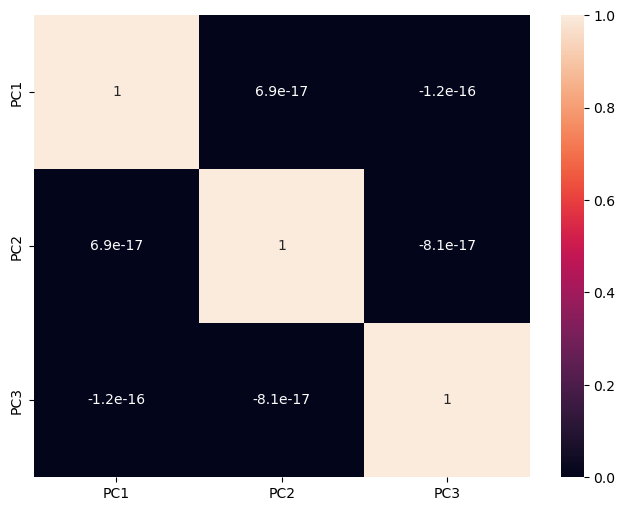

In [89]:
# Plotting Heatmap to check is there still dependency in the dataset.

plt.figure(figsize = (8,6))        
ax = sns.heatmap(PCA_df.corr(),annot = True)

<Axes: xlabel='PC3', ylabel='PC2'>

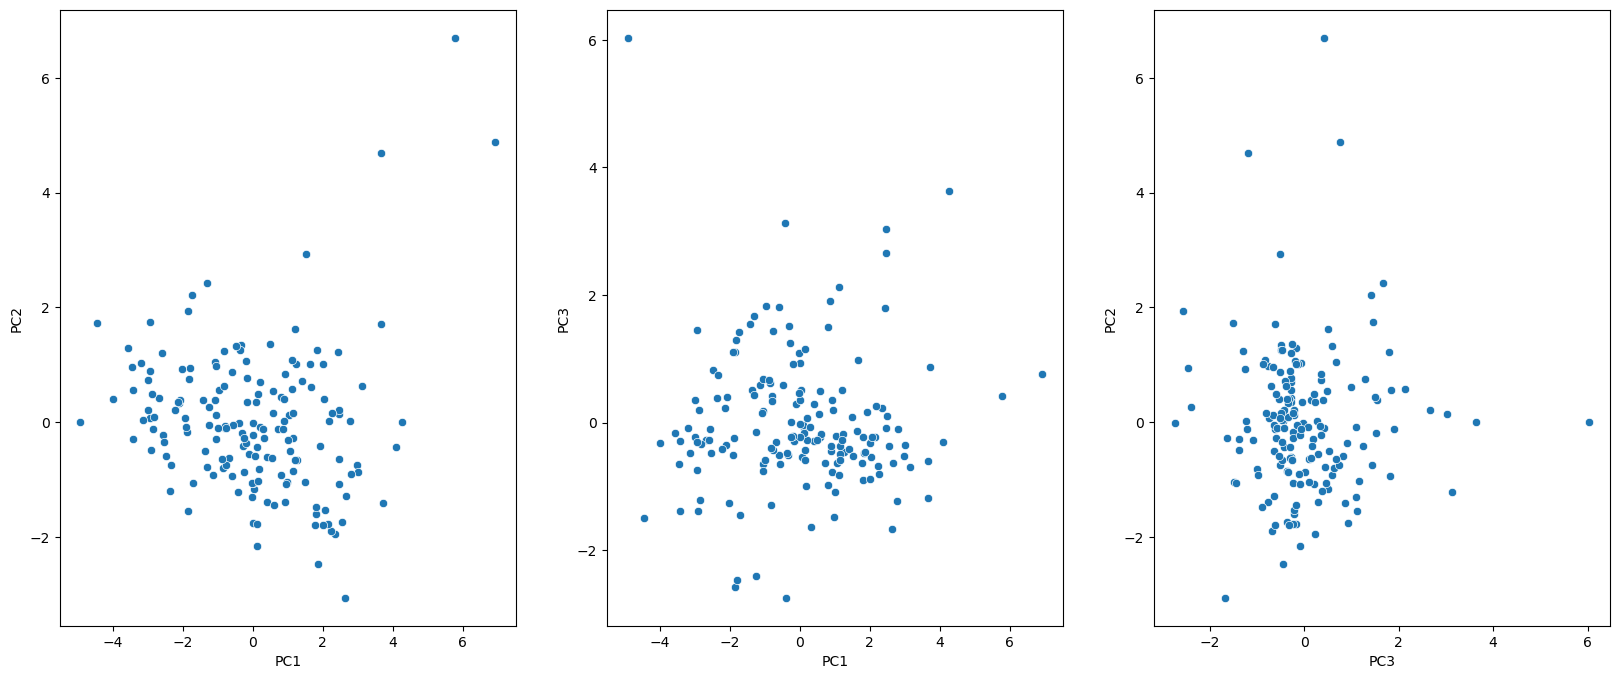

In [90]:
# Scatter Plot to visualize the spread of data across PCA components

plt.figure(figsize=(20, 8))
plt.subplot(1,3,1)
sns.scatterplot(data=PCA_df, x='PC1', y='PC2')
plt.subplot(1,3,2)
sns.scatterplot(data=PCA_df, x='PC1', y='PC3')
plt.subplot(1,3,3)
sns.scatterplot(data=PCA_df, x='PC3', y='PC2')

Outlier Analysis and Treatment

Text(0.5, 0, 'PC Components')

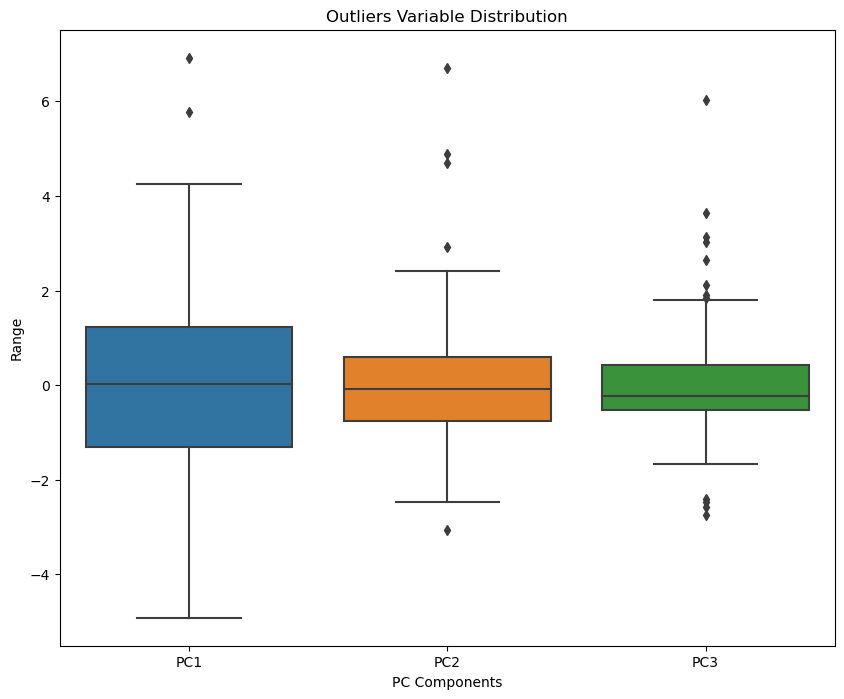

In [91]:
# Outlier Analysis 

outliers = ['PC1','PC2','PC3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = PCA_df[outliers])
plt.title("Outliers Variable Distribution")
plt.ylabel("Range")
plt.xlabel("PC Components")

In [92]:
# Statstical Outlier treatment for PC_1

Q1 = PCA_df.PC1.quantile(0.05)
Q3 = PCA_df.PC1.quantile(0.95)
IQR = Q3 - Q1
PCA_df = PCA_df[(PCA_df.PC1 >= Q1) & (PCA_df.PC1 <= Q3)]

In [93]:
# Statstical Outlier treatment for PC_2

Q1 = PCA_df.PC2.quantile(0.05)
Q3 = PCA_df.PC2.quantile(0.95)
IQR = Q3 - Q1
PCA_df = PCA_df[(PCA_df.PC2 >= Q1) & (PCA_df.PC2 <= Q3)]

In [94]:
# Statstical Outlier treatment for PC_3

Q1 = PCA_df.PC3.quantile(0.05)
Q3 = PCA_df.PC3.quantile(0.95)
IQR = Q3 - Q1
PCA_df = PCA_df[(PCA_df.PC3 >= Q1) & (PCA_df.PC3 <= Q3)]

Text(0.5, 0, 'PC Components')

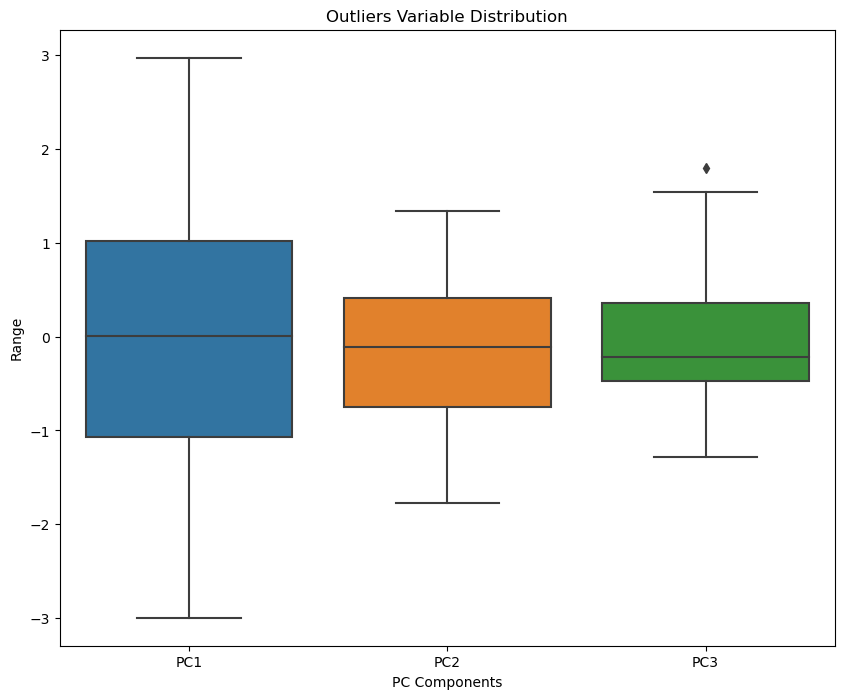

In [95]:
# Plot after Outlier removal 

outliers = ['PC1','PC2','PC3']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = PCA_df[outliers])
plt.title("Outliers Variable Distribution")
plt.ylabel("Range")
plt.xlabel("PC Components")